# 1-Introduction

Nama        : Hasan Abdul Hamid

Batch       : SBY-003

Objective   : Program ini dibuat untuk mengalisa data Superstore dan mencari insight dari data

[link Tableau](https://public.tableau.com/app/profile/hasan.abdul.hamid/viz/Milestone1_17074097470230/Story1?publish=yes)



# 2-Identifikasi Masalah

## 2.1- `Latar Belakang`

<div class="alert alert-block">"Superstore merupakan perusahaan di bidang retail di Amerika yang sudah berdiri lebih dari 20 tahun. Berbagai macam produk dijual untuk memenuhi kebutuhan sehari-hari semua kalangan. Di akhir periode 2017, Rapat Umum Pemegang Saham telah diselenggarakan dan telah disepakati bahwa target perusahaan kedepannya adalah meningkatkan profit perusahaan dengan target 5%. Telah disediakan data penjualan Superstore pada periode 2014 - 2017 yang selanjutnya akan diolah oleh data analis untuk menentukan arah kebijakan program agar tercipta keputusan yang lebih efektif untuk mencapai target perusahaan."</div>

## 2.2- `SMART Problem statement`

Specific    : Meningkatkan profit perusahaan

Measurable  : Meningkatkan profit YoY sebesar 5%

Achivable   : Berdasarkan produk yang dihasilkan perusahaan, meningkatkan profit sebesar 5% merupakan target yang bisa dicapai 

Relation    : Profit perusahaan yang dan memberikan dampak positif bagi perusahaan

Time-based  : Tiga bulan sejak program dimulai dan akan dievaluasi di akhir quarter


`Problem statement`

- Meningkatkan profit perusahaan sebesar 5% dalam jangka waktu tiga bulan

## 2.3- `Defining the problem (5W + 1H):`

1.	Bagaimana persebaran data profit?

2.	Berapa Lower Limit dan Upper Limit dari data profit?

3.	Bagaimana pergerakan trend sales dan profit per quarter? 

4.	Apakah  diskon dan sales memiliki korelasi terhadap profit?

5.	Bagaimana persebaran sales berdasarkan segmen customer?

6.	Bagaimana persebaran sales berdasarkan ship mode?

7.	Bagaimana persebaran sales berdasarkan kategori? Apakah berbanding lurus dengan profit?

8.	Bagaimana persebaran sales berdasarkan region? Apakah berbanding lurus dengan profit?

9.	Bagaimana persebaran sales berdasarkan state? Apakah berbanding lurus dengan profit?

10.	Apakah secara umum pertumbuhan sales dan profit berbanding lurus dengan?

# 3-Data Loading

## 3.1-Import Library

In [1]:
# Import Library
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\Lenovo\Hacktiv8\6. Milestone\0\samplesuperstore.csv", encoding='windows-1254')

Sumber data [klik disini](https://www.kaggle.com/datasets/vivek468/superstore-dataset-final/data)

In [3]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


## 3.2- Column Description

<div class="alert alert-block">

- Row ID => Unique ID for each row.

- Order ID => Unique Order ID for each Customer.

- Order Date => Order Date of the product.

- Ship Date => Shipping Date of the Product.

- Ship Mode=> Shipping Mode specified by the Customer.

- Customer ID => Unique ID to identify each Customer.

- Customer Name => Name of the Customer.

- Segment => The segment where the Customer belongs.

- Country => Country of residence of the Customer.

- City => City of residence of of the Customer.

- State => State of residence of the Customer.

- Postal Code => Postal Code of every Customer.

- Region => Region where the Customer belong.

- Product ID => Unique ID of the Product.

- Category => Category of the product ordered.

- Sub-Category => Sub-Category of the product ordered.

- Product Name => Name of the Product

- Sales => Sales of the Product (million).

- Quantity => Quantity of the Product.

- Discount => Discount provided (percent).

- Profit => Profit/Loss incurred (million).

</div>

# 4-Data Cleaning

## 4.1-Manipulasi Nama Kolom

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity


<div class="alert alert-block">
Manipulasi nama kolom diperlukan agar memermudah pemanggilan kolom dalam proses analisis

</div>

In [5]:
# Mengganti " " & "-" dengan "_"
df.columns = df.columns.str.replace(" ","_")
df.columns = df.columns.str.replace("-","_")

# Mengganti semua penamaan dengan huruf kecil
df.columns = df.columns.str.lower()

# Cek hasil manipulasi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row_id         9994 non-null   int64  
 1   order_id       9994 non-null   object 
 2   order_date     9994 non-null   object 
 3   ship_date      9994 non-null   object 
 4   ship_mode      9994 non-null   object 
 5   customer_id    9994 non-null   object 
 6   customer_name  9994 non-null   object 
 7   segment        9994 non-null   object 
 8   country        9994 non-null   object 
 9   city           9994 non-null   object 
 10  state          9994 non-null   object 
 11  postal_code    9994 non-null   int64  
 12  region         9994 non-null   object 
 13  product_id     9994 non-null   object 
 14  category       9994 non-null   object 
 15  sub_category   9994 non-null   object 
 16  product_name   9994 non-null   object 
 17  sales          9994 non-null   float64
 18  quantity


<div class="alert alert-block">
Nama kolom sudah diubah semua sesuai format

</div>

## 4.2- Changing Order Date & Ship date to datetime

Tipe data dari tiap kolom, dari data diatas terlihat bahwa `order_date` dan `ship_date` masih merupakan data string sehingga perlu diubah menjadi tipe data `date`

In [6]:
# Convert Order Date dan Ship Date ke Format Data "date"
df['order_date'] = df['order_date'].str.replace("/","")
df['order_date'] = pd.to_datetime(df['order_date'], format='%m%d%Y')

df['ship_date'] = df['ship_date'].str.replace("/","")
df['ship_date'] = pd.to_datetime(df['ship_date'], format='%m%d%Y')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   row_id         9994 non-null   int64         
 1   order_id       9994 non-null   object        
 2   order_date     9994 non-null   datetime64[ns]
 3   ship_date      9994 non-null   datetime64[ns]
 4   ship_mode      9994 non-null   object        
 5   customer_id    9994 non-null   object        
 6   customer_name  9994 non-null   object        
 7   segment        9994 non-null   object        
 8   country        9994 non-null   object        
 9   city           9994 non-null   object        
 10  state          9994 non-null   object        
 11  postal_code    9994 non-null   int64         
 12  region         9994 non-null   object        
 13  product_id     9994 non-null   object        
 14  category       9994 non-null   object        
 15  sub_category   9994 n


<div class="alert alert-block">
Tipe kolom `order_date` dan `ship_date` telah berhasil diubah ke tipe *datetime*

</div>

## 4.3-Checking Missing Value

In [7]:
df.isnull().sum()

row_id           0
order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
sub_category     0
product_name     0
sales            0
quantity         0
discount         0
profit           0
dtype: int64


<div class="alert alert-block">
Tidak ada data yang memiliki value 0 dalam data

</div>

In [8]:
df.isna().sum()

row_id           0
order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
sub_category     0
product_name     0
sales            0
quantity         0
discount         0
profit           0
dtype: int64


<div class="alert alert-block">
Tidak ada data yang memiliki value `None` dalam data

</div>

## 4.4-Checking Duplicate Type

In [9]:
df.duplicated().sum()

0

<div class="alert alert-block">
Tidak ada duplikat dalam data

</div>

# 5-EDA

## 5.1- Central tendency data profit

In [10]:
'''
Analisis ini ditujukan untuk mengetahui persebaran data profit
'''

df

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-12-01,2014-12-03,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [11]:
df.info() # Informasi tipe data kolom dalam tabel

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   row_id         9994 non-null   int64         
 1   order_id       9994 non-null   object        
 2   order_date     9994 non-null   datetime64[ns]
 3   ship_date      9994 non-null   datetime64[ns]
 4   ship_mode      9994 non-null   object        
 5   customer_id    9994 non-null   object        
 6   customer_name  9994 non-null   object        
 7   segment        9994 non-null   object        
 8   country        9994 non-null   object        
 9   city           9994 non-null   object        
 10  state          9994 non-null   object        
 11  postal_code    9994 non-null   int64         
 12  region         9994 non-null   object        
 13  product_id     9994 non-null   object        
 14  category       9994 non-null   object        
 15  sub_category   9994 n

### 5.1.1- Mean, Median dan Standar Deviasi

In [12]:
'''
Untuk memperoleh hasil uji statistik dalam periode perbulan, data analis memutuskan untuk melakukan group data 
dengan timeline "monthyear" 
'''

# Grouping data berdasarkan bulan
df_monthyear = df.set_index('order_date').resample('M').sum()
df_monthyear

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8768\1412590863.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_monthyear = df.set_index('order_date').resample('M').sum()


,row_id,postal_code,sales,quantity,discount,profit
order_date,,,,,,
2014-01-31,187192,2276830,8118.7120,124,4.35,1863.5464
2014-02-28,272235,3049775,4519.8920,159,8.10,862.3084
2014-03-31,871575,8314538,55691.0090,585,26.30,498.7299
2014-04-30,690625,7723827,28295.3450,536,14.85,3488.8352
2014-05-31,611708,6497804,23648.2870,466,18.95,2738.7096
2014-06-30,491794,6827435,34595.1276,521,23.22,4976.5244
2014-07-31,746403,9046189,33946.3930,550,24.55,-841.4826
2014-08-31,729301,8628386,27909.4685,609,20.05,5318.1050
2014-09-30,1298740,14521813,81777.3508,1000,42.87,8328.0994


In [13]:
# Mencari central tendency data profit
mean = df_monthyear['profit'].mean()
median = df_monthyear['profit'].median()
std = df_monthyear['profit'].std()

print('Rata-rata profit:', (mean))
print('Median profit:', (median))
print('Standar deviasi profit:', (std))

Rata-rata profit: 5966.604618750001
Median profit: 4863.45125
Standar deviasi profit: 4432.169869318681


<div class="alert alert-block">

* Rata-rata profit yang dihasilkan oleh superstore adalah $ 5966.6046 M/bulan
* Median profit superstore adalah $ 4863.4512 M
* Standar deviasi profit superstore adalah $ 4432.1698 M
</div>

### 5.1.2- Skewness dan Kurtosis

In [14]:
# Mencari Skew dan Kurtosis
print(f"Skewness profit: {df_monthyear['profit'].skew()}")
print(f"Kurtosis profit: {df_monthyear['profit'].kurtosis()}")

Skewness profit: 0.7892496944128985
Kurtosis profit: 0.3227742933871438


<div class="alert alert-block">

* Berdasarkan hasil statistik skewness data profit Superstore, menunjukkan bahwa data tidak terdistribusi normal atau mengalami skew. Nilai skew profit 0.7892 yang yang mana nilai tersebut diantara 0.5 - 1 menunjukkan bahwa data terdistribusi *moderately skew ke kanan*.
* Berdasarkan hasil kurtosis, menunjukkan nilai profit 0.3227 dimana nilai tersebut lebih besar dari 0 menunjukkan bahwa distribusi data mengalami *leptokurtic*. Leptokurtic adalah keadaan dimana data memiliki outlier lebih banyak dibanding dengan data yang terdistribusi normal
</div>

### 5.1.3- Mencari Outlier

In [15]:
# Mencari Lower Bound dan Upper Bound
low_bound = mean - 3*std
up_bound = mean + 3*std

print(f'Lower Boundary data profit adalah $ {low_bound:.2f} M/perbulan')
print(f'Upper Boundary data profit adalah $ {up_bound:.2f} M/perbulan' )

Lower Boundary data profit adalah $ -7329.90 M/perbulan
Upper Boundary data profit adalah $ 19263.11 M/perbulan


<Axes: >

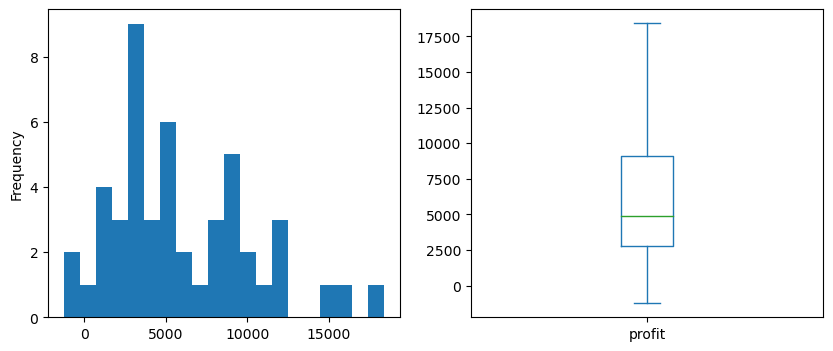

In [16]:
# Membuat grafik persebaran data 
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

df_monthyear['profit'].plot(kind='hist',bins=20,ax=ax[0])
df_monthyear['profit'].plot(kind='box',ax=ax[1])

In [17]:
outlier = df_monthyear['profit'][(df_monthyear['profit']<low_bound) | (df_monthyear['profit']>up_bound)]
no_outlier = df_monthyear['profit'][(df_monthyear['profit']>=low_bound) & (df_monthyear['profit']<=up_bound)]

print(f'Persentasi outlier dari data bulanan: {len(outlier)*100/len(df_monthyear["profit"]):.2f}%%')

Persentasi outlier dari data bulanan: 0.00%%


<div class="alert alert-block">
Dari analisa diatas dapat disimpulkan bahwa data yang sudah digrouping bersih dari outlier sehingga data bisa digunakan seluruhnya

</div>

## 5.2- Analisis Confidence Interval

In [18]:
# Mencari nilai batas bawah dan batas atas dalam data. Tingkat confidence yang diambil adalah 95%
median = np.median(df_monthyear['profit'])
IQR = np.percentile(df_monthyear['profit'], 75) - np.percentile(df_monthyear['profit'], 25)
N = len(df_monthyear['profit'])
confidence_level = 0.95
z_value = stats.norm.ppf((1 + confidence_level) / 2)

lower_limit = median - z_value * (IQR / np.sqrt(N))
upper_limit = median + z_value * (IQR / np.sqrt(N))

print(f'Lower Limit: $ {lower_limit:.2f} M')
print(f'Upper Limit: $ {upper_limit:.2f} M')

Lower Limit: $ 3093.57 M
Upper Limit: $ 6633.33 M


<div class="alert alert-block">
Perkiraan jumlah profit yang dapat dihasilkan setiap bulannnya berkisar antara minimal $ 3093.56 M hingga maksimal$ 6633.33.

</div>

## 5.3- Trend Sales and Profit

In [19]:
'''
Analis memutuskan untuk melakukan group data dengan timeline "quarter". Hal ini dilakukan untuk menampilkan pergerakan trend 
sales dan profit secara lebih sederhana dan mempermudah untuk mengambil kesimpulan terhadap growth masing-masing variabel
'''

df_quarter = df.set_index('order_date').resample('Q').sum()
trend = df_quarter.groupby('order_date')['sales','profit'].sum()

trend['sales_yoy'] = trend['sales'].pct_change(periods=4)
trend['profit_yoy'] = trend['profit'].pct_change(periods=4)

trend


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8768\2810131726.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_quarter = df.set_index('order_date').resample('Q').sum()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8768\2810131726.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  trend = df_quarter.groupby('order_date')['sales','profit'].sum()


,sales,profit,sales_yoy,profit_yoy
order_date,,,,
2014-03-31,68329.6130,3224.5847,NaN,NaN
2014-06-30,86538.7596,11204.0692,NaN,NaN
2014-09-30,143633.2123,12804.7218,NaN,NaN
2014-12-31,185745.9132,22310.5984,NaN,NaN
2015-03-31,58612.3246,11310.5516,-0.142212,2.507599
2015-06-30,89124.1870,12190.9224,0.029876,0.088080
2015-09-30,130259.5752,16853.6194,-0.093110,0.316203
2015-12-31,192536.4222,21263.5103,0.036558,-0.046932
2016-03-31,86090.9640,10435.8912,0.468820,-0.077331


In [20]:
# Menghitung rata-rata pertumbuhan
avg_sales_growth = trend['sales_yoy'].mean()
avg_profit_growth = trend['profit_yoy'].mean()

print(f'Rata-rata Sales YoY: {avg_sales_growth:.2%}')
print(f'Rata-rata Profit YoY: {avg_profit_growth:.2%}')

Rata-rata Sales YoY: 15.87%
Rata-rata Profit YoY: 42.61%


<div class="alert alert-block">
Rata growth periode 2014-2017:

- Sales YoY: 15.87%
- Profit YoY: 42.61%
</div>

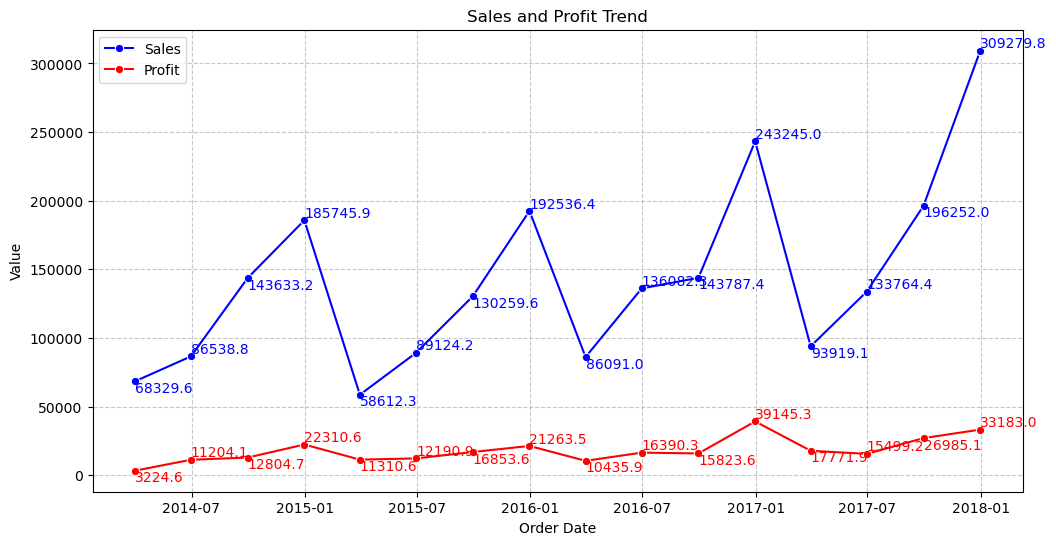

In [21]:
# Visualisasi menggunakan Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='order_date', y='sales', data=df_quarter, label='Sales', marker='o', linestyle='-', color='b')
sns.lineplot(x='order_date', y='profit', data=df_quarter, label='Profit', marker='o', linestyle='-', color='r')

# Menambahkan label pada linechart
for line in plt.gca().lines:
    x_data = line.get_xdata()
    y_data = line.get_ydata()
    
    for i, (x, y) in enumerate(zip(x_data, y_data)):
        plt.text(x, y, f'{y:.1f}', color=line.get_color(), ha='left', va='top' if i % 2 == 0 else 'bottom')

plt.title('Sales and Profit Trend')
plt.xlabel("Order Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

<div class="alert alert-block">

- Tren sales dari Superstore pada tahun 2014-2017 memiliki pergerakan yang fluktuatif. Terjadi kemiripan pergerakan dimana selalu ada tren kenaikan dari  Q3 ke Q4 dan tren penurunan dari Q4 ke Q1. Namun tren menunjukkan performa sales yang cenderung naik dari tahun ke tahun.
- Sedangkan pergerakan tren profit kurang lebih cenderung sama dengan tren sales. Meskipun cenderung sama, ada perbedaan pergerakan tren di beberapa titik periode yaitu 2016Q3 dan 2017Q2.</div>

## 5.4- Korelasi Diskon dan Sales terhadap Profit

In [22]:
# Membuat fungsi korelasi
def corr(col):
  tmp = df.groupby(col)[['profit']].mean().reset_index()
  tau, pval = stats.kendalltau(tmp[col],tmp['profit'])
  print('Kendall Tau:',tau)
  print('P-value:',pval)

### 5.4.1- Korelasi Diskon dan Profit

**H0**: `Diskon berkorelasi positif dengan Profit`

**H1**: `Diskon berkorelasi negatif dengan Profit`

<Axes: xlabel='discount', ylabel='profit'>

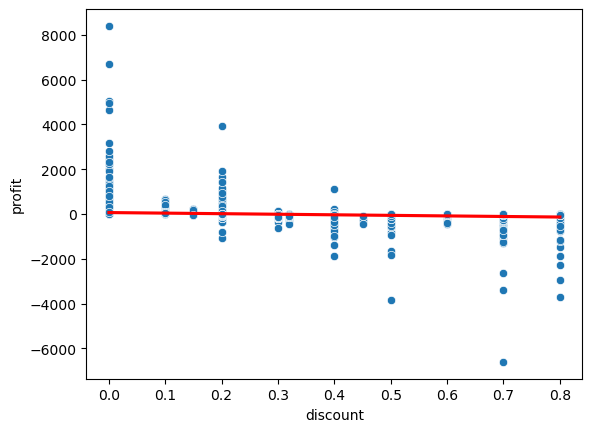

In [23]:
# scat_df = sns.load_dataset("df")
sns.scatterplot(data = df, x='discount', y='profit')

# Menambahkan tren menggunakan regplot
sns.regplot(data=df, x='discount', y='profit', scatter=False, color='red')

Chart scatter plot diatas menunjukkan bahwa semakin besar diskon maka semakin kecil profit yang akan didapat

In [24]:
corr('discount') # Menghitung korelasi diskon dan profit

Kendall Tau: -0.6363636363636362
P-value: 0.003181646992410881


<div class="alert alert-block">
Hasil korelasi <kendall-tau> antara kolom 'discount' dan 'profit' menunjukkan <b>korelasi yang negatif</b>. Ini menjelaskan  bahwa semakin besar discount produk profit yang didapat akan semakin kecil. Nilai p-value di angka 0.003 > 0.05, menunjukkan bahwa <fenomena tersebut bukan sebuah kebetulan dan nyata terjadi>. 

Dengan hasil ini dapat diambil kesimpulan bahwa H0 berhasil ditolak dan H1 diterima.

</div>

### 5.4.2- Korelasi Sales dan Profit

**H0**: `Sales berkorelasi negatif dengan Profit`

**H1**: `Sales berkorelasi positif dengan Profit`

<Axes: xlabel='sales', ylabel='profit'>

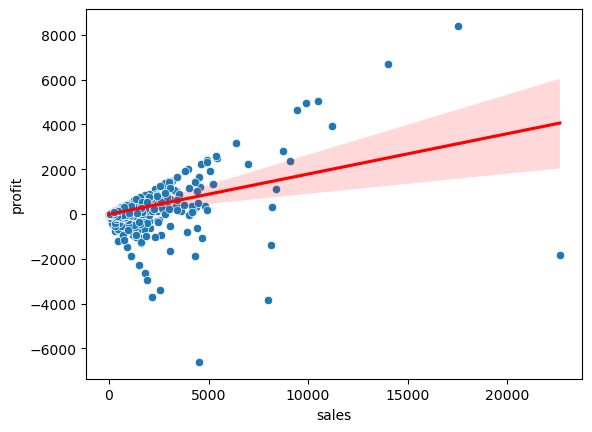

In [25]:
# Scatter plot sales dan profit
sns.scatterplot(data = df, x='sales', y='profit')

# Menambahkan tren menggunakan regplot
sns.regplot(data=df, x='sales', y='profit', scatter=False, color='red')

Chart scatter plot diatas menunjukkan bahwa semakin besar sales maka semakin besar profit yang akan didapat

In [26]:
corr('sales') # Menghitung korelasi sales dan profit

Kendall Tau: 0.4049461444484201
P-value: 0.0


<div class="alert alert-block">
Hasil korelasi <kendall-tau> antara kolom 'sales' dan 'profit' menunjukkan <b>korelasi yang positif</b>. Ini menjelaskan  bahwa semakin besar sales produk profit yang didapat akan juga semakin besar. Nilai p-value di angka 0.0 > 0.05, menunjukkan bahwa <fenomena tersebut bukan sebuah kebetulan dan nyata terjadi>. 

Dengan hasil ini dapat diambil kesimpulan bahwa H0 berhasil ditolak dan H1 diterima.

</div>

## 5.5- Perseberan Sales based on Segment

In [1]:
# Membuat tabel segment sales
seg_sales = df.groupby('segment')
seg_sales

NameError: name 'df' is not defined

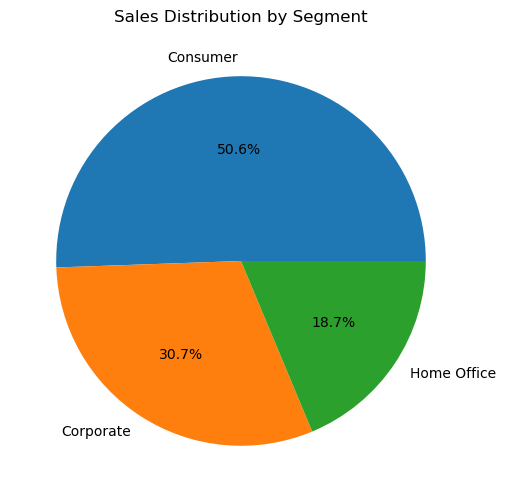

In [28]:
# Pie Chart Segment Sales
plt.figure(figsize=(6,6))
plt.title("Sales Distribution by Segment")
plt.pie(seg_sales, labels=seg_sales.index, autopct='%1.1f%%')
plt.show()

<div class="alert alert-block">
Segment Consumer merupakan segment dengan tingkat pembelian terbanyak mencapai angka `50.6%`. Bahkan jumlah sales Consumer lebih dari dua kali lipat dari sales segment Home Office yang hanay mencapai 18.7%.

</div>

## 5.5- Persebaran Sales based on Ship Mode

In [29]:
# Membuat tabel ship sales
ship_sales = df.groupby('ship_mode').agg('sales').sum()

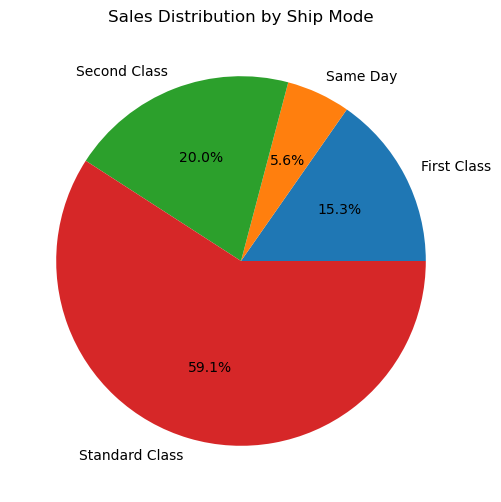

In [30]:
# Membuat Pie Chart Ship Mode
plt.figure(figsize=(6,6))
plt.title("Sales Distribution by Ship Mode")
plt.pie(ship_sales, labels=ship_sales.index, autopct='%1.1f%%')
plt.show()

<div class="alert alert-block">
Lebih dari separuh pengiriman produk menggunakan mode pengiriman Standard Class yang merupakan mode pengiriman paling diminati konsumen dengan presentase `59.1%`

</div>

## 5.6- Persebaran Sales dan Profit Berdasarkan Kategori

In [31]:
# Tabel Sales Category
cat_sales = df.groupby('category')['sales'].sum().sort_values(ascending=False).reset_index()
cat_sales

,category,sales
0,Technology,836154.0330
1,Furniture,741999.7953
2,Office Supplies,719047.0320


In [32]:
# Tabel Profit Category
cat_profit = df.groupby('category')['profit'].sum().sort_values(ascending=False).reset_index()
cat_profit

,category,profit
0,Technology,145454.9481
1,Office Supplies,122490.8008
2,Furniture,18451.2728


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8768\3003050616.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=cat_sales, x='sales', y='category', ax=axes[0], ci=None)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8768\3003050616.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=cat_profit, x='profit', y='category', ax=axes[1], ci=None)


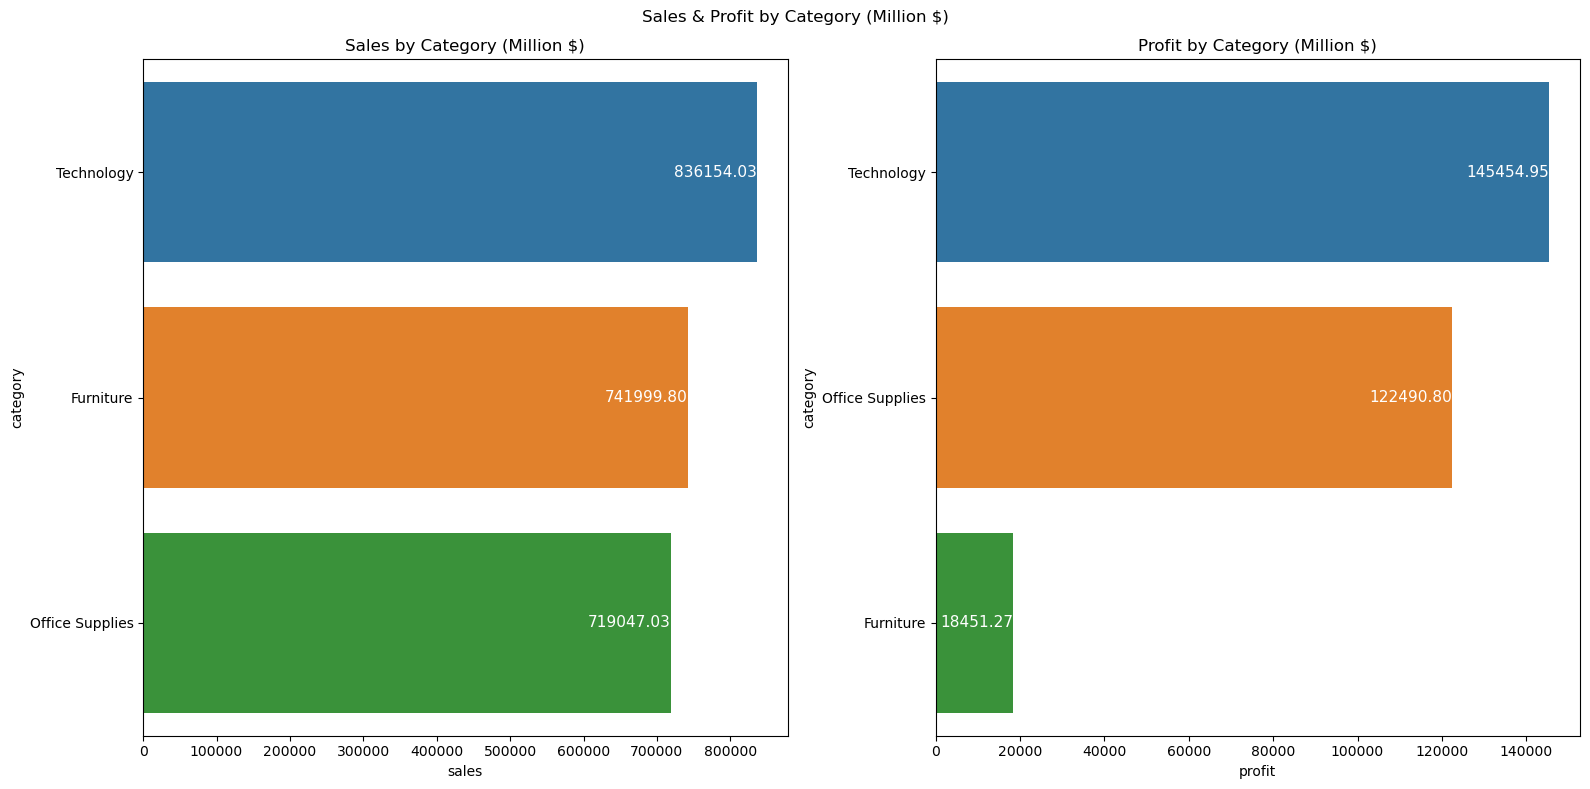

In [33]:
# Define figure and axes
fig, axes = plt.subplots(ncols=2, figsize=(16, 8))

# Bar chart sales
sns.barplot(data=cat_sales, x='sales', y='category', ax=axes[0], ci=None)
axes[0].set_title("Sales by Category (Million $)")

# Menambahkan label di dalam bar chart sales
for i, val in enumerate(cat_sales['sales']):
    axes[0].text(val, i, f'{val:.2f}', va='center', ha='right', color='white', fontsize=11)

# Bar chart profit
sns.barplot(data=cat_profit, x='profit', y='category', ax=axes[1], ci=None)
axes[1].set_title("Profit by Category (Million $)")

# Menambahkan label di dalam bar chart profit
for i, val in enumerate(cat_profit['profit']):
    axes[1].text(val, i, f'{val:.2f}', va='center', ha='right', color='white', fontsize=11)

# Figure title
fig.suptitle("Sales & Profit by Category (Million $)")

plt.tight_layout()
plt.show()


<div class="alert alert-block"> 

* Data berdasarkan kategori sales menunjukkan produk Technology meraih total sales tertinggi diangka $ 836154.03 M, diikuti Furniture dan Office Supplies.
* Sedangkan dari profit furniture menjadi produk dengan perolehan profit paling sedikit di angka $ 18451.27 M."</div>

## 5.7- Persebaran Sales dan Profit Berdasarkan Sub Category

In [34]:
# Tabel sales subcategory
sub_sales = df.groupby('sub_category')['sales'].sum().sort_values(ascending=False).reset_index().head(5)
sub_sales

,sub_category,sales
0,Phones,330007.054
1,Chairs,328449.103
2,Storage,223843.608
3,Tables,206965.532
4,Binders,203412.733


In [35]:
# Tabel profit subcategory
sub_profit = df.groupby('sub_category')['profit'].sum().sort_values(ascending=False).reset_index()
sub_profit

,sub_category,profit
0,Copiers,55617.8249
1,Phones,44515.7306
2,Accessories,41936.6357
3,Paper,34053.5693
4,Binders,30221.7633
5,Chairs,26590.1663
6,Storage,21278.8264
7,Appliances,18138.0054
8,Furnishings,13059.1436
9,Envelopes,6964.1767


<div class="alert alert-block">
Dari tabel diatas ditemukan bahwa ada tiga sub_category yang mengalami loss yaitu Supplies, Bookcases dan Tables.

</div>

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8768\3341673836.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=sub_sales, x='sales', y='sub_category', ax=axes[0], ci=None)


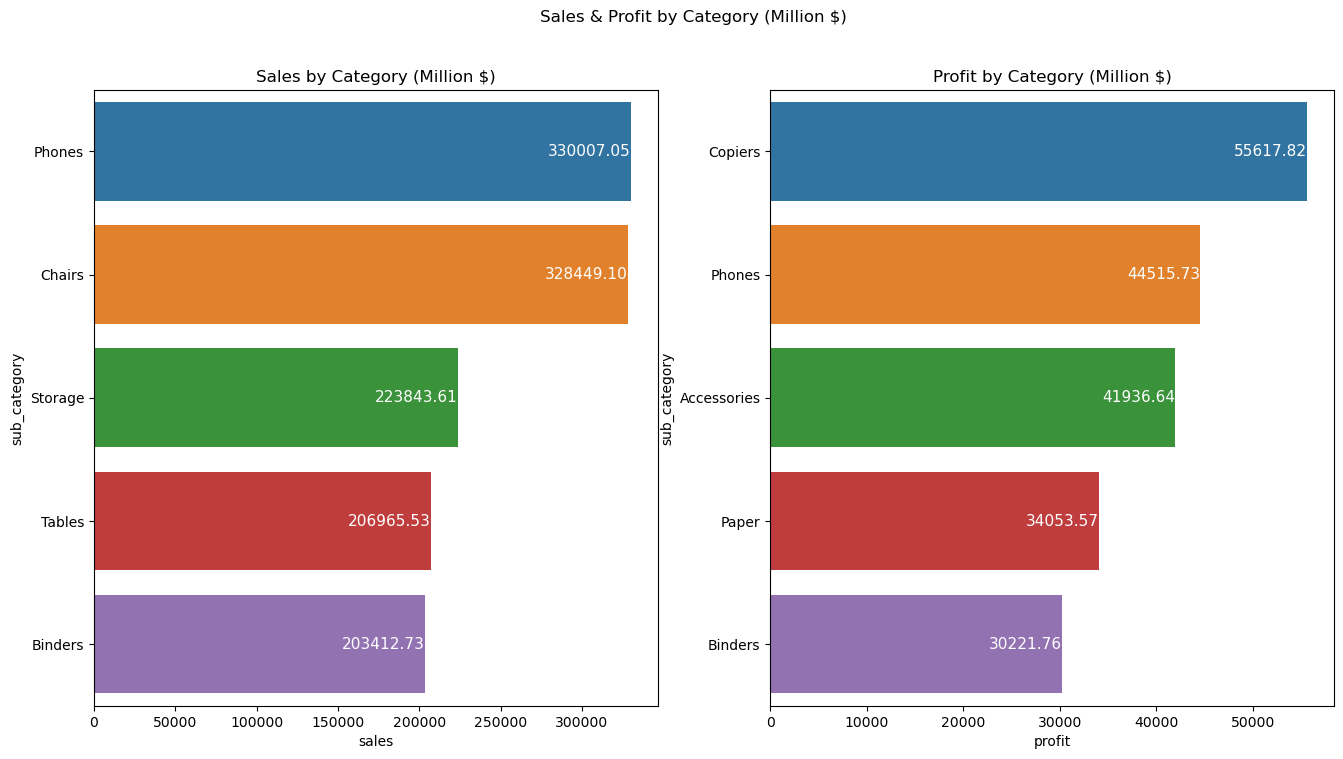

In [36]:
sub_sales = df.groupby('sub_category')['sales'].sum().sort_values(ascending=False).reset_index().head(5)
sub_profit = df.groupby('sub_category')['profit'].sum().sort_values(ascending=False).reset_index().head(5)

# Define figure and axes
fig, axes = plt.subplots(ncols=2, figsize=(16,8))

# Bar chart sales
sns.barplot(data=sub_sales, x='sales', y='sub_category', ax=axes[0], ci=None)
axes[0].set_title("Sales by Category (Million $)")

# Menambahkan label di dalam bar chart sales
for i, val in enumerate(sub_sales['sales']):
    axes[0].text(val, i, f'{val:.2f}', va='center', ha='right', color='white', fontsize=11)

# Bar chart profit
sns.barplot(data=sub_profit, x='profit', y='sub_category', ax=axes[1])
axes[1].set_title("Profit by Category (Million $)")

# Menambahkan label di dalam bar chart profit
for i, val in enumerate(sub_profit['profit']):
    axes[1].text(val, i, f'{val:.2f}', va='center', ha='right', color='white', fontsize=11)

# Figure title
fig.suptitle("Sales & Profit by Category (Million $)")
#fig.subplots_adjust(top=1.3)

plt.show()

<div class="alert alert-block"> 

* Phones adalah produk yang paling banyak oleh superstore diikut storage dan meja.
* Sedangkan dari segi profit, phones berada dibawah copiers (55617.8249) dengan total profit 44515.7306. Di posisi ketiga disumbang oleh accessories dengan 41936.6357"</div>

## 5.8- Persebaran Sales dan Profit Berdasarkan Region

In [37]:
# Tabel sales region
reg_sales = df.groupby('region')['sales'].sum().sort_values(ascending=False).reset_index()
reg_sales

,region,sales
0,West,725457.8245
1,East,678781.2400
2,Central,501239.8908
3,South,391721.9050


In [38]:
# Tabel profit region
reg_profit = df.groupby('region')['profit'].sum().sort_values(ascending=False).reset_index()
reg_profit

,region,profit
0,West,108418.4489
1,East,91522.7800
2,South,46749.4303
3,Central,39706.3625


Text(0.5, 0.98, 'Sales & Profit by Category (Million $)')

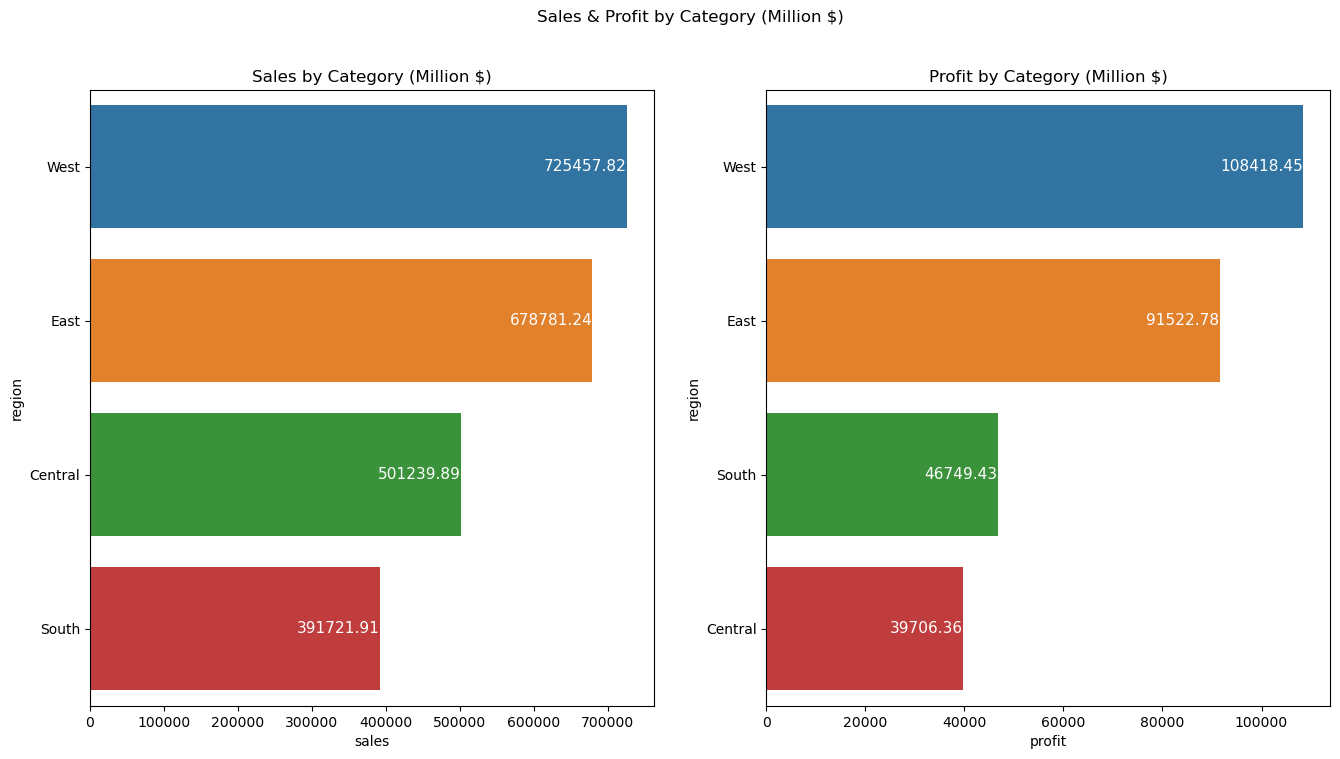

In [39]:
# Define figure and axes
fig, axes = plt.subplots(ncols=2, figsize=(16,8))

# Bar chart language
sns.barplot(data=reg_sales, x='sales', y='region', ax=axes[0])
axes[0].set_title("Sales by Category (Million $)")

# Menambahkan label di dalam bar chart sales
for i, val in enumerate(reg_sales['sales']):
    axes[0].text(val, i, f'{val:.2f}', va='center', ha='right', color='white', fontsize=11)

# Bar chart country
sns.barplot(data=reg_profit, x='profit', y='region', ax=axes[1])
axes[1].set_title("Profit by Category (Million $)")

# Menambahkan label di dalam bar chart profit
for i, val in enumerate(reg_profit['profit']):
    axes[1].text(val, i, f'{val:.2f}', va='center', ha='right', color='white', fontsize=11)

# Figure title
fig.suptitle("Sales & Profit by Category (Million $)")
#fig.subplots_adjust(top=1.3)

<div class="alert alert-block"> 

* Region West merupakan region dengan tingkat sales tertinggi diikuti dengan region East. Dari segi profit dua region ini memiliki hasil yang berbanding lurus
* Anomali terjadi di region Central yang meskipun tingkat salesnya lebih tinggi dari south, tingkat profit yang diperoleh justru lebih rendah 
</div>

## 5.9- Distribusi Sales and Profit by State

In [40]:
# Tabel sales state
state_sales = df.groupby('state')['sales'].sum().sort_values(ascending=False).reset_index().head(5)
state_sales

,state,sales
0,California,457687.6315
1,New York,310876.2710
2,Texas,170188.0458
3,Washington,138641.2700
4,Pennsylvania,116511.9140


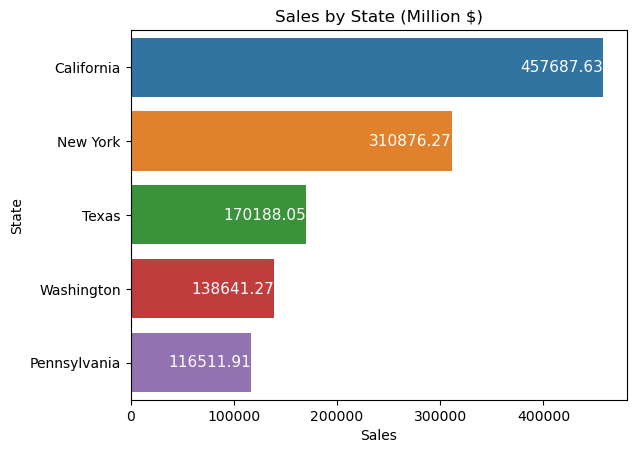

In [41]:
# Buat barplot sales state
sns.barplot(data=state_sales, x='sales', y='state')
plt.title("Sales by State (Million $)")
plt.xlabel("Sales")
plt.ylabel("State")

# Menambahkan label di dalam bar chart sales
for i, val in enumerate(state_sales['sales']):
        plt.text(val, i, f'{val:.2f}', va='center', ha='right', color='white', fontsize=11)

plt.show()

<div class="alert alert-block">  
California merupakan state dengan penjualan tertinggi

</div>

In [42]:
# Tabel state profit
state_profit = df.groupby('state')['profit'].sum().sort_values(ascending=False).reset_index().head(10)
state_profit

,state,profit
0,California,76381.3871
1,New York,74038.5486
2,Washington,33402.6517
3,Michigan,24463.1876
4,Virginia,18597.9504
5,Indiana,18382.9363
6,Georgia,16250.0433
7,Kentucky,11199.6966
8,Minnesota,10823.1874
9,Delaware,9977.3748


In [43]:
# Table state loss
state_loss = df.groupby('state')['profit'].sum().sort_values(ascending=True).reset_index().head(10)
state_loss

,state,profit
0,Texas,-25729.3563
1,Ohio,-16971.3766
2,Pennsylvania,-15559.9603
3,Illinois,-12607.8870
4,North Carolina,-7490.9122
5,Colorado,-6527.8579
6,Tennessee,-5341.6936
7,Arizona,-3427.9246
8,Florida,-3399.3017
9,Oregon,-1190.4705


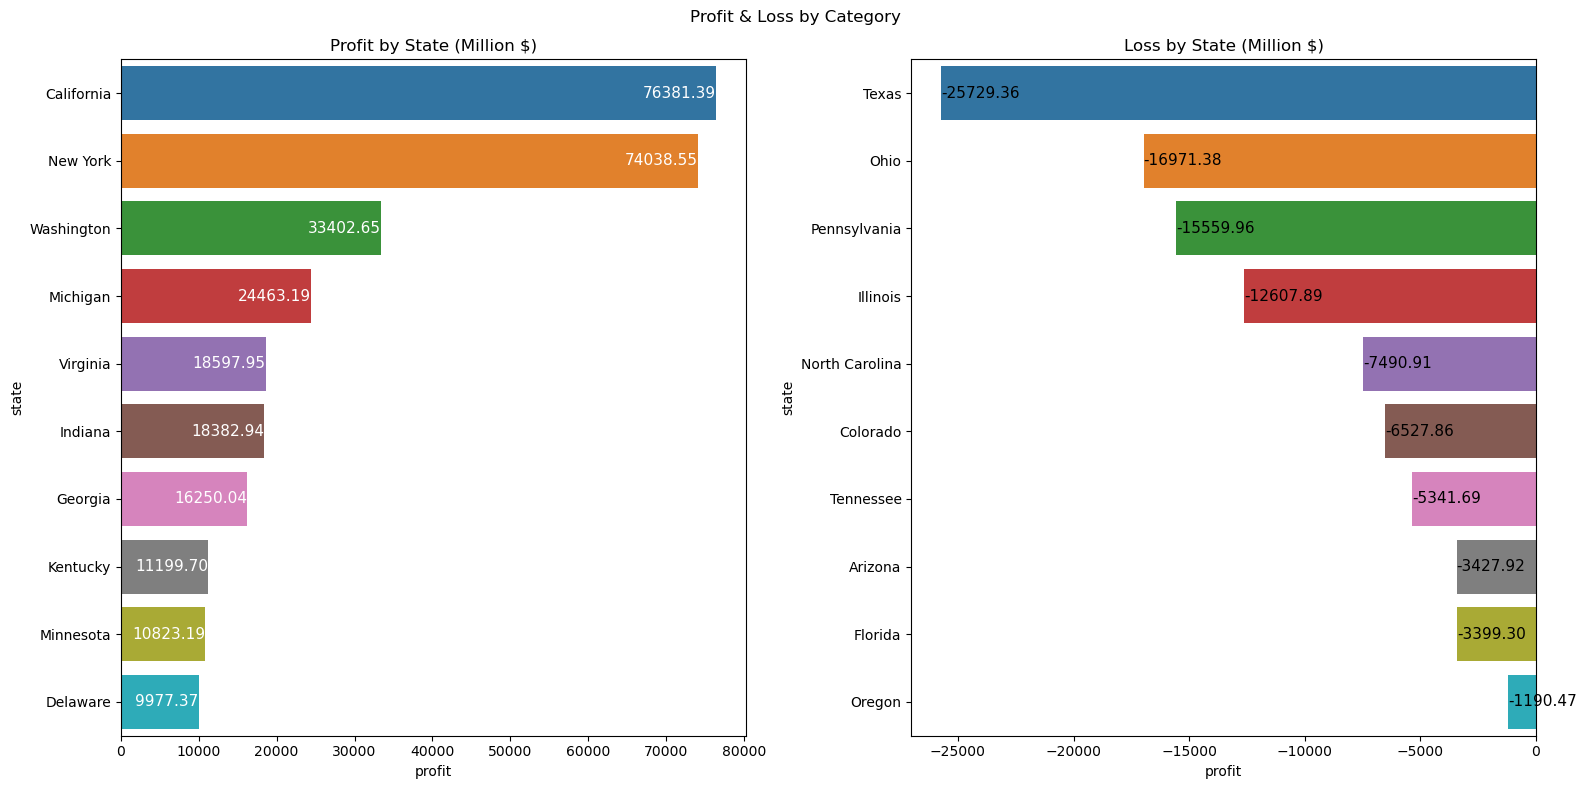

In [44]:
# Define figure and axes
fig, axes = plt.subplots(ncols=2, figsize=(16,8))

# Bar chart language
sns.barplot(data= state_profit, x='profit', y='state', ax=axes[0])
axes[0].set_title("Profit by State (Million $)")

# Menambahkan label di dalam bar chart profit
for i, val in enumerate(state_profit['profit']):
    axes[0].text(val, i, f'{val:.2f}', va='center', ha='right', color='white', fontsize=11)

# Bar chart country
sns.barplot(data= state_loss, x='profit', y='state', ax=axes[1])
axes[1].set_title("Loss by State (Million $)")

# Menambahkan label di dalam bar chart profit
for i, val in enumerate(state_loss['profit']):
    axes[1].text(val, i, f'{val:.2f}', va='center', ha='left', color='black', fontsize=11)

# Figure title
fig.suptitle("Profit & Loss by Category")
#fig.subplots_adjust(top=1.3)

plt.tight_layout()

<div class="alert alert-block">

- California juga merupakan state dengan perolehan profit tertinggi di angka $ 76381.38 M
- Texas memiliki loss tertinggi diangka $ 25729.35 M

</div>

## 5.10- Perbandingan Trend Sales dan Profit

In [45]:
'''
Kode ini berfungsi untuk menormalisasi nilai dari data sales menggunakan metode min-max normalization
'''

sales_mean = df['sales'].mean()
sales_std = df['sales'].std()
norm_sales = []
sales_mean
sales_std

for i in df['sales']:
    normalize = (i-sales_mean)/sales_std
    norm_sales.append(normalize)

df['norm_sales'] = norm_sales
df['norm_sales']

0       0.051508
1       0.805593
2      -0.345350
3       1.167630
4      -0.332919
          ...   
9989   -0.328298
9990   -0.221258
9991    0.046078
9992   -0.321315
9993    0.021343
Name: norm_sales, Length: 9994, dtype: float64

In [46]:
'''
Kode ini berfungsi untuk menormalisasi nilai dari data profit menggunakan metode min-max normalization
'''

profit_mean = df['profit'].mean()
profit_std = df['profit'].std()
norm_profit = []
profit_mean
profit_std

for i in df['profit']:
    normalize = (i-profit_mean)/profit_std
    norm_profit.append(normalize)

df['norm_profit'] = norm_profit
df['norm_profit']

0       0.056590
1       0.815013
2      -0.092997
3      -1.757397
4      -0.111587
          ...   
9989   -0.104816
9990   -0.055595
9991   -0.039544
9992   -0.065470
9993    0.189068
Name: norm_profit, Length: 9994, dtype: float64

In [47]:
df

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,product_id,category,sub_category,product_name,sales,quantity,discount,profit,norm_sales,norm_profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,0.051508,0.056590
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,0.805593,0.815013
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,-0.345350,-0.092997
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,1.167630,-1.757397
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,-0.332919,-0.111587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-12-01,2014-12-03,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,-0.328298,-0.104816
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,-0.221258,-0.055595
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,0.046078,-0.039544
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,-0.321315,-0.065470


In [59]:
df.to_csv("superstore_norm.csv", index=False) # Data disimpan, diconvert dalam bentuk .csv

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8768\1713202367.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_quarter = df.set_index('order_date').resample('Q').sum()


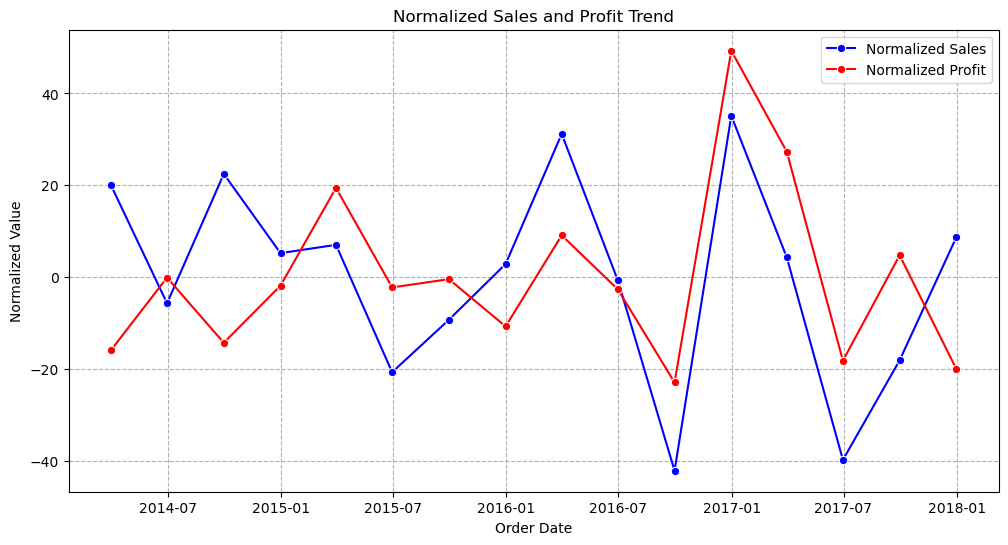

In [54]:
# Mengelompokkan ulang data ke quarter setelah menambah kolom baru 
df_quarter = df.set_index('order_date').resample('Q').sum()

# Visualisasi menggunakan Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='order_date', y='norm_sales', data=df_quarter, label='Normalized Sales', marker='o', linestyle='-', color='b')
sns.lineplot(x='order_date', y='norm_profit', data=df_quarter, label='Normalized Profit', marker='o', linestyle='-', color='r')

plt.title('Normalized Sales and Profit Trend')
plt.xlabel("Order Date")
plt.ylabel("Normalized Value")
plt.legend()
plt.grid(True, linestyle='--', alpha=1)

plt.show()

<div class="alert alert-block">
Terjadi anomali di beberapa quarter yang mana pergerakan sales dan profit tidak berbanding lurus. Fenomena ini terjadi tiga kali pada tahun 2014 (Q2,Q3 Q4), satu kali di 2015 (Q4) dan 2017 (Q4)

</div>

# 6-Conclusion

Berdasarkan hasil analisis data Superstore periode 2014-2017 tim data analis mendapatkan kesimpulan dan beberapa rekomendasi diantaranya:

•	Rata-rata growth profit YoY sebesar 42.61%, maka target mencapai pertumbuhan sebesar 5% untuk quarter kedepan sangat mungkin dicapai

•	Penerapan promo diskon dapat difokuskan ke produk kategori Technology dan Office Supplies. Tidak disarankan untuk membuat promo diskon di furniture karena menghasilkan persentase profit paling sedikit

•	Mengadakan program membership untuk segmen Consumer sebagai customer mayoritas superstore

•	Technology dapat menjadi fokus utama sales untuk penigkatan profit secara maksimal dengan cara menambah diversifikasi produk atau peningkatan jasa after sales

•	Menambah dan menjaga hubungan dengan perusahaan rekanan untuk memaksimalkan profit di kategori Office Supplies

•	Mempertimbangkan untuk mencari supplier baru khususnya untuk produk-produk yang mengalami loss profit di periode 2014-2017 (Supliplies, Bookcases, Tables)

•	Audit cashflow dan performa kinerja di terutama di region atau state dengan sales yang tinggi dengan profit yang rendah (Contoh: Region: Central, State: Texas)

